In [1]:
%matplotlib inline

# Orca Database Analysis 

This notebook is intended to perform a quick analysis of the Orca pings database. 

In [2]:
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

from scipy import stats

In [3]:
# Connect to the database 
DBPATH = "/Users/benjamin/.orca/orca.db" 
conn = sqlite3.connect(DBPATH)

# Load the data 
sql  = (
    "SELECT src.name, dst.name, l.latitude, l.longitude, p.latency "
    "FROM pings p "
    "    JOIN devices src on p.source_id = src.id "
    "    JOIN devices dst on p.target_id = dst.id "
    "    JOIN locations l on p.location_id = l.id "
    "WHERE latency is not null and latency > 0"
)
data = pd.read_sql(sql, conn)

In [4]:
# Some simple wrangling 
data["location"] = "(" + data['latitude'].apply(str) + ", " + data['longitude'].apply(str) + ")"
del data["latitude"]
del data["longitude"]

In [5]:
data.head()

,name,name,latency,location
0,apollo,lagoon,284.205364,"(38.9213, -77.0386)"
1,apollo,lagoon,155.126965,"(38.9213, -77.0386)"
2,apollo,lagoon,149.934142,"(38.9213, -77.0386)"
3,apollo,lagoon,149.106926,"(38.9213, -77.0386)"
4,apollo,lagoon,179.089509,"(38.9213, -77.0386)"


In [6]:
# Remove outliers 
def remove_outliers(df, passes=1):
    """
    Removes all data points that are less than 3 standard deviations from the mean. 
    Can run multiple passes to remove data at different granularities. 
    """
    total = len(df)
    
    for _ in range(passes):
        df = df[(np.abs(stats.zscore(df['latency'])) < 3)]
    
    print("Removed {} rows from {} original".format(total-len(df), total))
    return df

In [7]:
# Statistical Description 
print(data.describe())

            latency
count  4.692300e+04
mean   7.971171e+02
std    1.249513e+05
min    9.147003e+01
25%    1.349382e+02
50%    1.485861e+02
75%    1.542505e+02
max    2.705601e+07


## Distribution of Latency

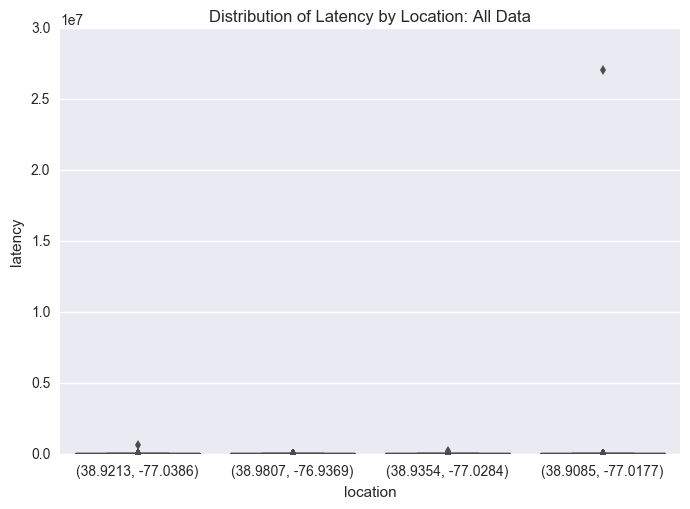

In [8]:
g = sns.boxplot(y=data['latency'], x=data['location'])
g.set_title("Distribution of Latency by Location: All Data")

Removed 2 rows from 46923 original


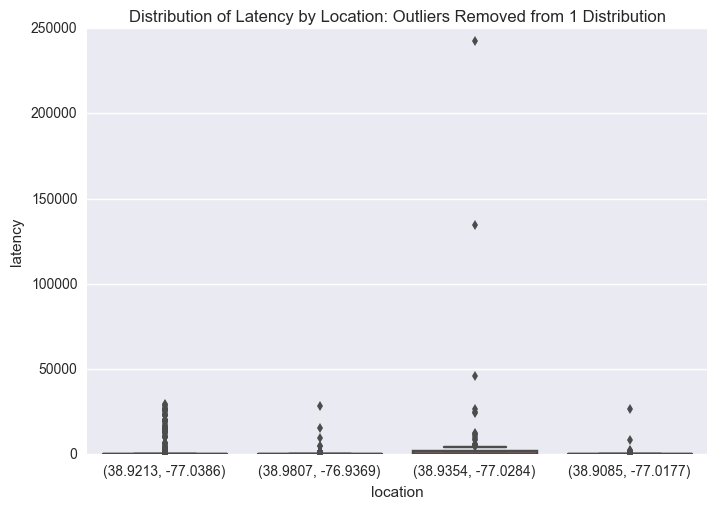

In [9]:
d = remove_outliers(data)
g = sns.boxplot(y=d['latency'], x=d['location'])
g.set_title("Distribution of Latency by Location: Outliers Removed from 1 Distribution")

Removed 122 rows from 46923 original


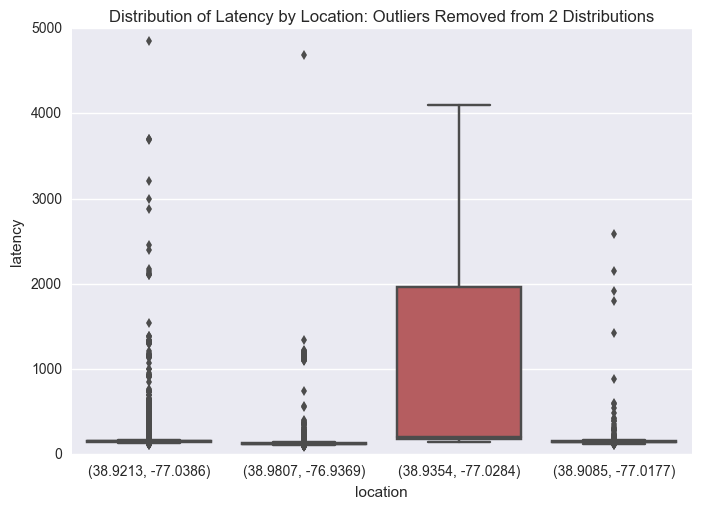

In [10]:
d = remove_outliers(data, 2)
g = sns.boxplot(y=d['latency'], x=d['location'])
g.set_title("Distribution of Latency by Location: Outliers Removed from 2 Distributions")

Removed 441 rows from 46923 original


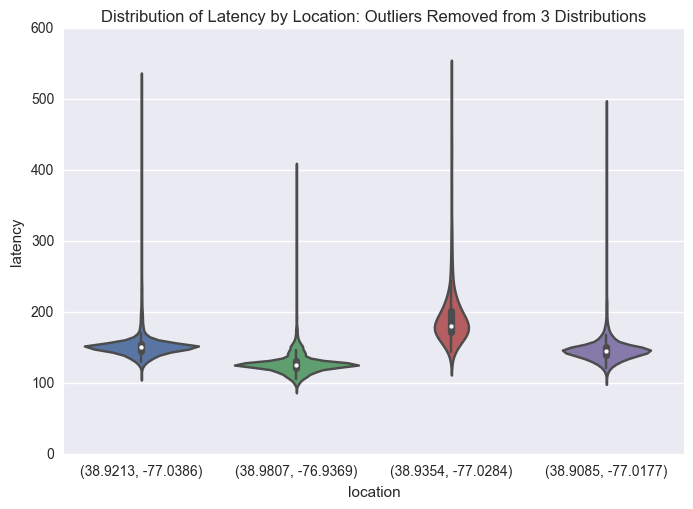

In [11]:
d = remove_outliers(data, 3)
g = sns.violinplot(y=d['latency'], x=d['location'])
g.set_title("Distribution of Latency by Location: Outliers Removed from 3 Distributions")

Removed 1081 rows from 46923 original


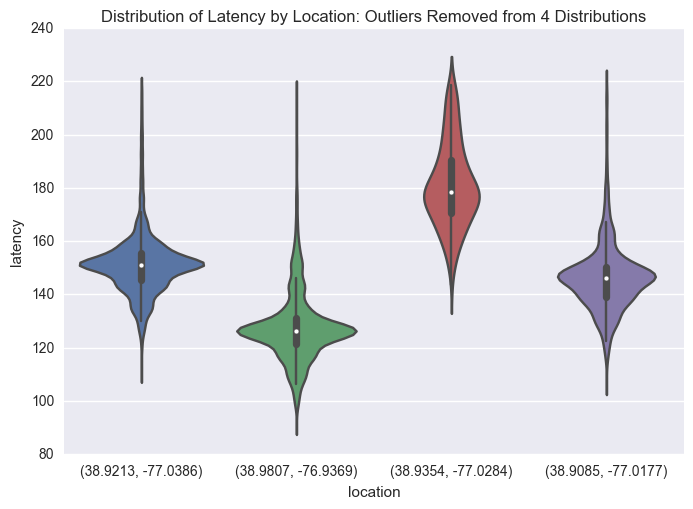

In [12]:
d = remove_outliers(data, 4)
g = sns.violinplot(y=d['latency'], x=d['location'])
g.set_title("Distribution of Latency by Location: Outliers Removed from 4 Distributions")